# <span style="color: red"> Analysis of Correlation Function $Q(t)$ from Molecular Simulations with Python code   </span>

In this Jupyter notebook, an analysis of $Q(t)$ curves obtained through molecular simulations, computed at different temperatures $T$ with Python, will be performed. The correlation function $Q(t)$ is used to characterize the dynamics of particles in complex systems, such as supercooled liquids and glasses. This function measures the persistence of particle configurations over time, monitoring how well particles maintain their relative positions with respect to their initial position.

**Important premise:** as written in the principal Jupyter notebook `NVE_simulation.ipynb` (the notebook used to perform our Python molecular simulation of the Kob-Andersen Lennard-Jones system in $3D$ system), length, energy and time scales are measured in units of $\sigma_{AA}$, $\epsilon_{AA}$ and $\sqrt{\frac{\sigma_{AA}^2}{ \epsilon_{AA}}}$ .

We have done simulation in the temperature range $T \in  [0.41, 3.0] K$. We have equilibrated the system for $\sim  10^7$   MD steps (for the `LAMMPS` simulations) depending on the system size and the production runs are at least $5 − 6$ times bigger than the equilibration runs. We have used integration time steps $\Delta t = 0.005$.

## Definition of Correlation Function $Q(t)$
The function $Q(t)$ is defined as:

\begin{equation}
Q(t) = \frac{1}{N}\sum_{i=1}^N w (|\mathbf{r}_{i} (t)-\mathbf{r}_{i}( 0)|)
\end{equation}
where $N$ is the total number of particles, $\mathbf{r_i}(t)$ is the position of particle $i$ at time $t$, and $w(r)$ is a window function that assigns a weight of 1 if the distance $r$ between the current and initial positions is less than or equal to a threshold $a_0$, and 0 otherwise.

So, $w(r)$ is defined as:
\begin{equation}
w(r) = \begin{cases} 1, & \mbox{if }r \le a_0 \mbox{} \\ 0, & \mbox{otherwise }\mbox{ } \end{cases}
\end{equation}

**Analysis goal:** 


The aim is to compare the $Q(t)$ curves obtained at different temperatures with the results reported in the paper by Karmakar et al. This comparison will allow to better understand the dynamic behavior of the simulated system and to evaluate its consistency with the known theoretical and experimental results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

# Get the current directory
current_directory = os.getcwd()
print("La directory corrente è:", current_directory)

# Change current directory to 'Q(t)' folder
os.chdir('Q(t)')
# Get the current directory
current_directory = os.getcwd()

print("La directory corrente è:", current_directory)

La directory corrente è: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto
La directory corrente è: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto\Q(t)


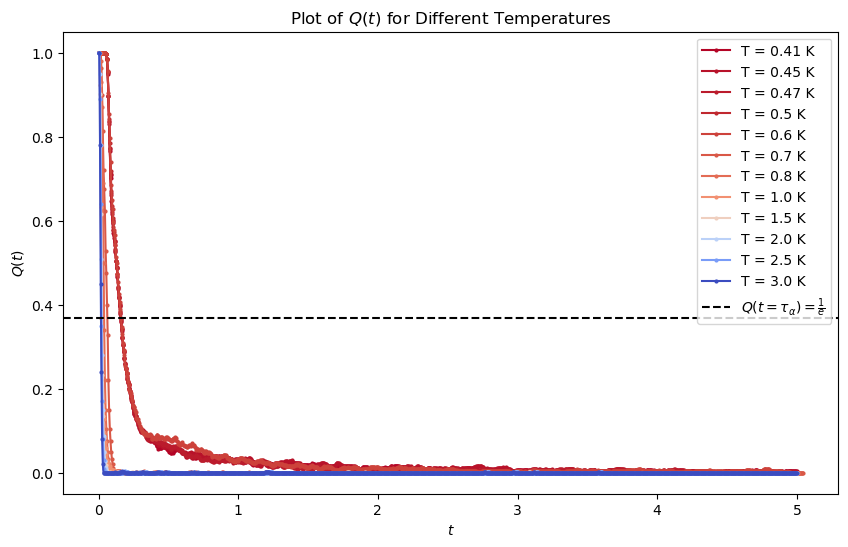

In [2]:
# Map of file names to corresponding temperatures
file_temperature_map = {
    "Q(t)_T_0.41.txt": 0.41,
    "Q(t)_T_0.45.txt": 0.45,
    "Q(t)_T_0.47.txt": 0.47,
    "Q(t)_T_0.50.txt": 0.50,
    "Q(t)_T_0.60.txt": 0.60,
    "Q(t)_T_0.70.txt": 0.70,
    "Q(t)_T_0.80.txt": 0.80,
    "Q(t)_T_1.00.txt": 1.0,
    "Q(t)_T_1.50.txt": 1.50,
    "Q(t)_T_2.00.txt": 2.0,
    "Q(t)_T_2.50.txt": 2.5,
    "Q(t)_T_3.00.txt": 3.0
}

# We utilize the same Δt of the Python simulations:
Deltat = 0.005


plt.figure(figsize=(10, 6))

# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():
   
    Q = np.loadtxt(file_name)
    
    # Time array:
    time = np.arange(len(Q)) * Deltat 
    
    # Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot Q(t):
    plt.plot(time, Q, label=f'T = {temperature} K', color=color, marker='o', markersize=2)

# Labels and title:
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title(r'Plot of $Q(t)$ for Different Temperatures')

# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')

plt.legend()

#plt.grid(True)

# Save plot as png image: 
plt.savefig('plot_Q(t)_Python_Simulation.png')

plt.show()

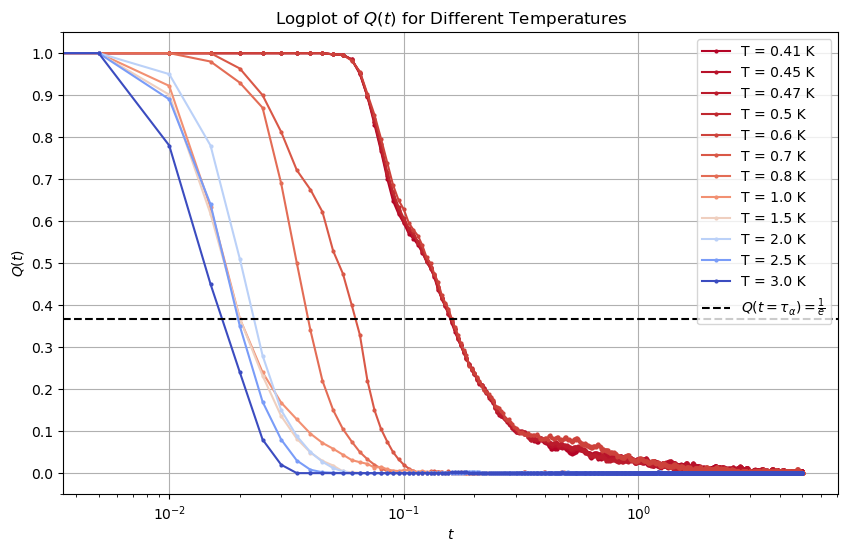

In [3]:
plt.figure(figsize=(10, 6))

# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():

    Q = np.loadtxt(file_name)
    
    # Time array:
    time = np.arange(len(Q)) * Deltat 
    
    # Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot Q(t):
    plt.loglog(time, Q, label=f'T = {temperature} K', color=color, marker='o', markersize=2)

# Labels and title:
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.yscale('symlog')

# Use FuncFormatter to format y-axis ticks
formatter = FuncFormatter(lambda y, _: '{:.1f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.yticks(np.arange(0.0, 1.1, 0.1))  # Values from 0.0 to 1.0 with step 0.1

plt.title(r'Logplot of $Q(t)$ for Different Temperatures')

# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')

plt.legend()

plt.grid(True)

# Save plot as png image: 
plt.savefig('plot_Q(t)_Python_Simulation_loglog.png')

plt.show()

## Comparison with Karmakar Paper

As can be seen from the plot reproduced in the paper, there are notable differences in the trend of the correlation curve $Q(t)$: it can be observed that there is no marked difference between the ballistic regime at the initial time instants and the $\beta$-relaxation regime. For the highest temperature, we can instead see how the curve trend tend to follow the theoretical one predicted by the paper.

![Karmakar_Schematic_Raffiguration](Q(t)/karmakar_schematic_raffiguration.png)

It almost seems as if the $\beta$-relaxation regime does not even exist in the simulations with the lowest $T$ temperatures (just a very slight inflection of the curve can be seen).

This is the graph of the paper in which all the correlation curves obtained for different temperatures are depicted.

![Kamarkar_Plot_Q_different_T](Q(t)/karmakar_plot_Q(t)_different_temperatures.png)

### Detection of $\tau_{\alpha}$

In [4]:
# Detection of t_alpha for Q_total:
def find_tau_alpha(Q):
    """
    Finds tau_alpha, time step in which Q(t) decreases to 1/e
    
    Parameters:
    Q (numpy array)

    Returns:
    tau_alpha (int)
    """
    
    # Compute 1/e (Q_initial/e):
    Q_initial = Q[0]
    target_value = Q_initial / np.e
    
    # Find index in which Q(t) is nearest to Q(0)/e:
    tau_alpha_index = np.argmin(np.abs(Q - target_value))
    
    return tau_alpha_index

In [5]:
# List to save indexes:
tau_alpha_indexes = []

for file_name, temperature in file_temperature_map.items():
   
    Q = np.loadtxt(file_name)
    
    # Time array:
    time = np.arange(len(Q)) * Deltat 
    
    # Calculate tau_alpha for each Q(t) 
    tau_alpha = find_tau_alpha(Q)
    
    # Store the value in corresponding time 
    tau_alpha_time = time[tau_alpha]
    tau_alpha_indexes.append(tau_alpha_time)

In [6]:
# print tau_alpha values for each Temperature 
for temperature, tau_alpha_time in zip(file_temperature_map.values(), tau_alpha_indexes):
    print(f"Temperature: {temperature}K, τ_α = {tau_alpha_time:.4f}")

Temperature: 0.41K, τ_α = 0.1600
Temperature: 0.45K, τ_α = 0.1600
Temperature: 0.47K, τ_α = 0.1600
Temperature: 0.5K, τ_α = 0.1600
Temperature: 0.6K, τ_α = 0.1600
Temperature: 0.7K, τ_α = 0.0600
Temperature: 0.8K, τ_α = 0.0400
Temperature: 1.0K, τ_α = 0.0200
Temperature: 1.5K, τ_α = 0.0200
Temperature: 2.0K, τ_α = 0.0250
Temperature: 2.5K, τ_α = 0.0200
Temperature: 3.0K, τ_α = 0.0150


In [7]:
# Converting the list into a numpy array:
tau_alpha_array = np.array(tau_alpha_indexes)

# Output file to save values of tau_alpha;
output_file = 'tau_alpha_values.txt'

# Save in txt file
np.savetxt(output_file, tau_alpha_array)

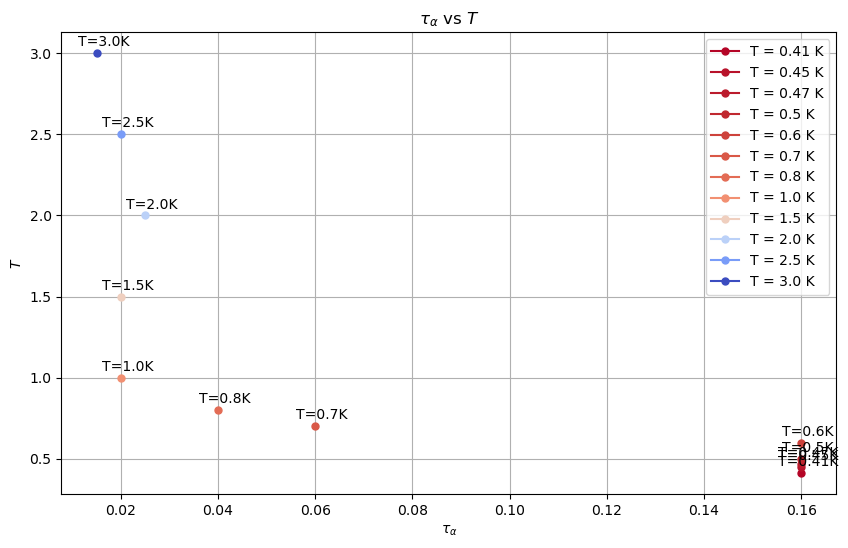

In [8]:
plt.figure(figsize=(10, 6))

# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

# We iterate over each temperature and tau_alpha time:
for temperature, tau_alpha_time in zip(file_temperature_map.values(), tau_alpha_indexes):
    
    # Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot Q(t):
    plt.plot(tau_alpha_time, temperature, label=f'T = {temperature} K', color=color, marker='o', markersize=5)
    
    # Annotate each point with the temperature
    plt.annotate(f'T={temperature}K', 
                 (tau_alpha_time, temperature), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')

# Labels and title:
plt.xlabel(r'$\tau_{\alpha}$')
plt.ylabel(r'$T$')
plt.legend()
plt.grid(True)
plt.title(r'$\tau_{\alpha}$ vs $T$')

# Save plot as png image: 
plt.savefig('plot_tau_alpha__Python_Simulation_vs_T.png')

plt.show()

Our code produced values of $\tau_{\alpha}$, which represent the characteristic time over which the correlation function $Q(t)$ decreases to $1/e$ of its initial value for each temperature. Our plot above seems to indicate an interesting observation regarding the relationship between $\tau_{\alpha}$ and the temperature $T$.

### Comment on Results
1. **General Trend:**

increasing Temperature and Decreasing $\tau_{\alpha}$: As the temperature $T$ increases, the value of $\tau_{\alpha}$ appears to decrease. This reflects the typical behavior of dynamical systems where, at higher temperatures, the mobility of particles increases, leading to a **faster** relaxation of the system. In other words, at higher temperatures, particles relax faster, so $\tau_{\alpha}$ decreases.

2. **Constancy of $\tau_{\alpha}$ at Low Temperatures:**

note that we obtained constant values for $0.41K \le T \le 0.6K$: for the first temperatures in fact $\tau_{\alpha}$ is constant at $0.1600$.
This may indicate that, in this range of low temperatures, the system reaches a similar state of relaxation, where the characteristic time for the decrease to $1/e$ is similar. It could be that the system has a very similar relaxation dynamics at low temperatures, or that the time scale for these temperatures is longer and therefore does not detect significant variations.

A possible cause for the observed behavior at low temperatures could be the detection threshold: it is possible that the temporal resolution of the data or the numerical precision is not high enough to differentiate the changes in the relaxation times at low temperatures. Perhaps for this temperature range $[0.41K;0.6K]$ we should decrease the time interval between timesteps $\Delta t$ (in the Python code `Deltat`) of the simulation, so that it is fine enough to detect important changes in the values of $\tau_{\alpha}$.

The .txt file `tau_alpha_values.txt`, that we have made with this notebook, will be used as reference in the notebook `analysis_chi_4(t).ipynb` to have a comparison with the time of peak values of $\chi_4(t)$, labeled as $\chi_4^P$. 

This will be done because, from the Kamarkar paper, is written that: 'The peak value of $\chi_4(t)$ is defined as $\chi_4^P  \equiv  \chi_4(t = \tau_4)$, where $\tau_4$ is the time at which $\chi_4(t)$ attains its maximum value (see left panel of Fig.2) and  $\tau_4  \simeq \tau_{\alpha}$ at all temperatures $T$.'

So, the analysis of the molecular simulation can continue to the notebook `analysis_chi_4(t).ipynb` for a more accurate analysis (compared to that conducted in the general notebook `NVE_simulation.ipynb`) of the four-point susceptibility function $\chi_4(t)$ of the molecular system simulation.